# Importation des bibliothèques

In [53]:
import sys
sys.path.insert(0, '..')


In [54]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare , Softmax , TanH , Sigmoide
from sequentiel import Sequentiel , Optim
from loss  import MSELoss , CELoss , BCELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.datasets import mnist

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Chargement des données USPS

In [55]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
N_train , d1, d2 = X_train.shape
N_test = X_test.shape[0]

X_train  = X_train.reshape(N_train , d1*d2).astype('float32') 
X_test = X_test.reshape(N_test, d1*d2).astype('float32') 

#Normalisation des données 
X_train /= 255
X_test /= 255

print(X_train.shape , X_test.shape)

(60000, 784) (10000, 784)


In [47]:
nb_train = 5000
nb_test = 100

X_train = X_train[:nb_train]
y_train = y_train[:nb_train]
X_test = X_train[:nb_test]
y_test = y_train[:nb_test]

y_train , y_test = y_train.reshape(-1,1) , y_test.reshape(-1,1)

# Expérimentations

## Apprentissage avec des donnéess non-bruitées

### Création du modéle auto_encodeur 1

In [14]:
input_size = X_train.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

print(optimiser._net)

In [29]:
batch_size = 20
epochs = 500

optimiser.SGD(X_train, X_train, batch_size, epochs)

## Visualisation de le prediction des données Test

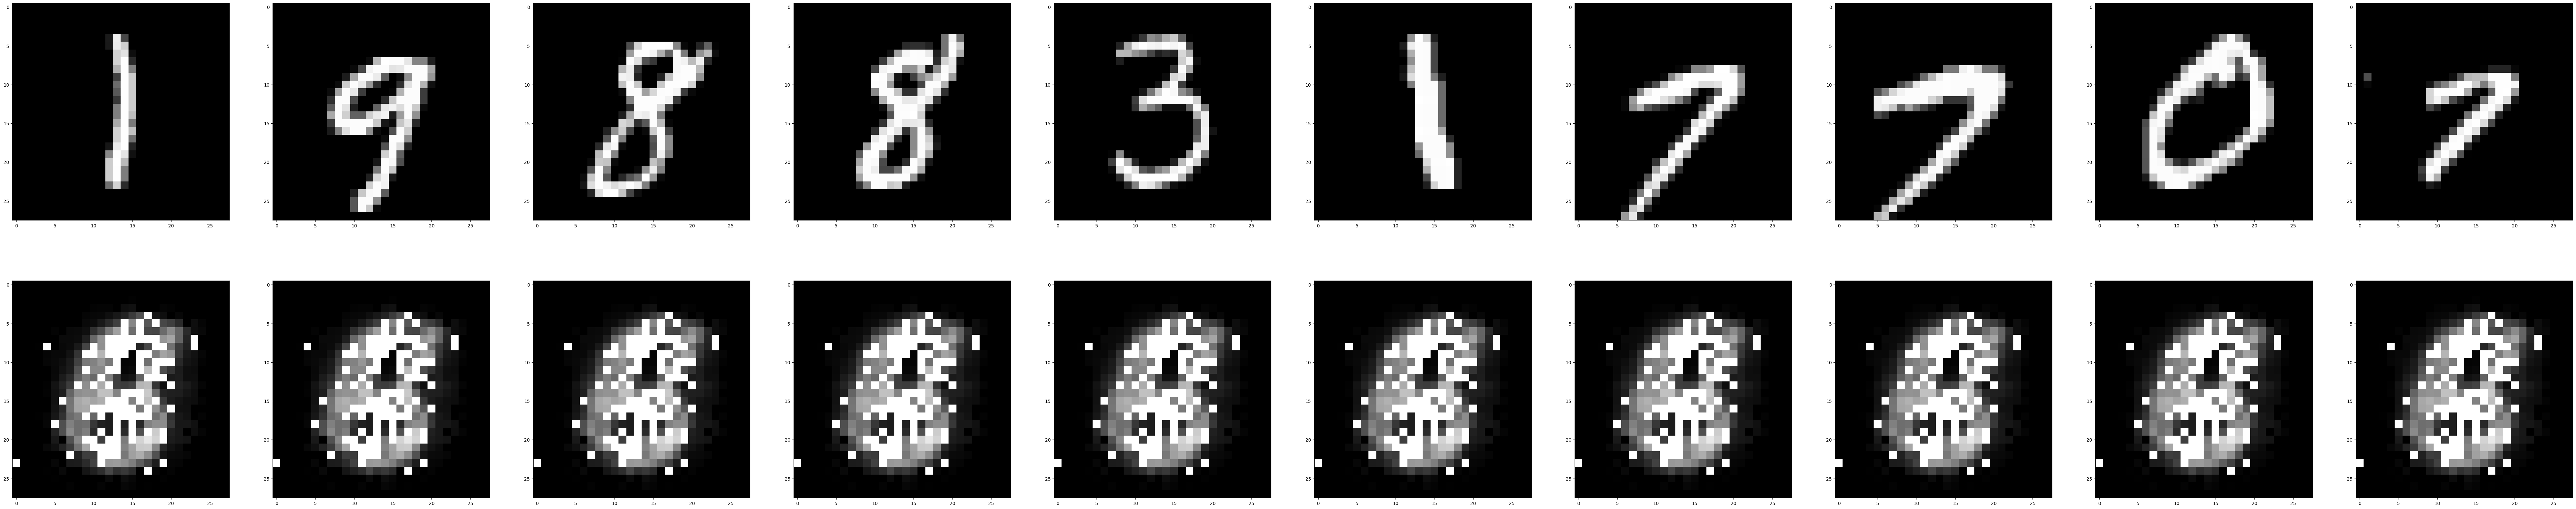

In [41]:
nb_examples = 10
index = np.random.choice(np.arange(X_test.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser._net.forward(np.asarray([X_test[i]])))
    
    j+=1

### Création du modéle auto_encodeur 2

In [43]:
input_size = X_train.shape[1]
hidden_1 = 100
output_size = 10



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser2 = Optim(network,loss,eps=1e-3)

In [46]:
batch_size = 20
epochs = 500

optimiser2.SGD(X_train, X_train, batch_size, epochs)

## Visualisation de le prediction des données Test

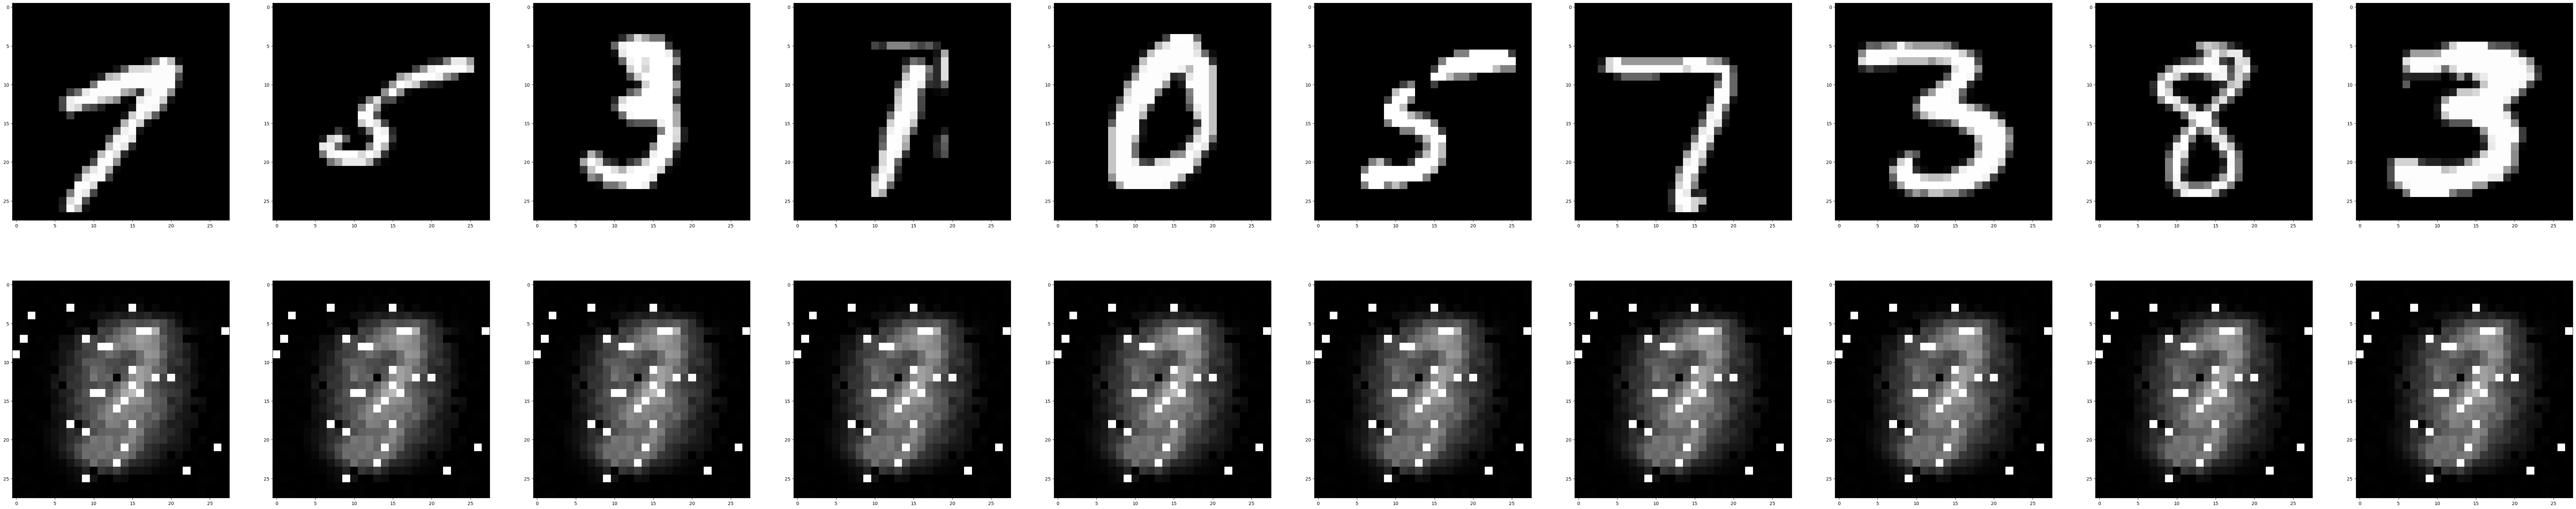

In [45]:
nb_examples = 10
index = np.random.choice(np.arange(X_test.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser2._net.forward(np.asarray([X_test[i]])))
    
    j+=1

### Création du modéle auto_encodeur 3

In [60]:
input_size = X_train.shape[1]
hidden_1 = 100
output_size = 144



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser3 = Optim(network,loss,eps=1e-4)

In [61]:
batch_size = 100
epochs = 200

losses = optimiser3.SGD(X_train, X_train, batch_size, epochs)

0
0.5845221300249969
1
0.5721956290535749
2
0.5716725928932044
3
0.5712110101226648
4
0.559425968977736
5
0.5535033393483093
6
0.5469097519183551
7
0.5468815902831814
8
0.5468704467978385
9
0.5467352688931213
10
0.5465736976318989
11
0.5465685472348943
12
0.5465672917115205
13
0.5465695912473565
14
0.5465702814723337
15
0.5465703888840924
16
0.546570747595969
17
0.5465714257333091
18
0.5465711896172188
19
0.5465707166716263
20
0.5465698873634713
21
0.5465684847411018
22
0.5465596454028112
23
0.5415962862848852
24
0.5413433762553395
25
0.5413434570993354
26
0.5413434701082703
27
0.541343454360151
28
0.5413431142446163
29
0.5413427111596929
30
0.5413419362958843
31
0.5413387656574645
32
0.5410798230774542
33
0.5410794383484601
34
0.5410790663559052
35
0.5410785144774355
36
0.5410774914588068
37
0.5410754867014981
38
0.5410789299355682
39
0.5410778684346617
40
0.5410748147215805
41
0.5363748846249179
42
0.5363124253255243
43
0.536270113680382
44
0.5362687950587449
45
0.5362674148028341
46

In [63]:
batch_size = 20
epochs = 500
losses = optimiser3.SGD(X_train, X_train, batch_size, epochs)

0
0.4956077583415596
1
0.4956080512671729
2
0.49560791088193995
3
0.4956078283040103
4
0.4956077230095016
5
0.49560762098406946
6
0.495607458879301
7
0.49560714714273457
8
0.49560637698754795
9
0.4955995187721147
10
0.48864517128557866
11
0.48864515137501113
12
0.48864515942981196
13
0.4886451252674677
14
0.4886451317335845
15
0.4886451377301335
16
0.48864510374460013
17
0.4886451099705146
18
0.48864511101384106
19
0.4886450882402556
20
0.4886450983794918
21
0.48864506594059437
22
0.48864507444852495
23
0.4886450650894578
24
0.4886450596674024
25
0.48864504681095616
26
0.48864503707901136
27
0.48864503369283996
28
0.4886450048430996
29
0.4886450144027521
30
0.4886449789476201
31
0.4886449884939967
32
0.4886449531595917
33
0.4886449586979716
34
0.4886449160258914
35
0.4886449175964478
36
0.4886448780452299
37
0.4886448685877629
38
0.4886448078266185
39
0.48864478926839344
40
0.48864471823061806
41
0.4886450398582216
42
0.488667961739595
43
0.48866775540260765
44
0.4886668848292204
45
0.

## Visualisation de le prediction des données Test

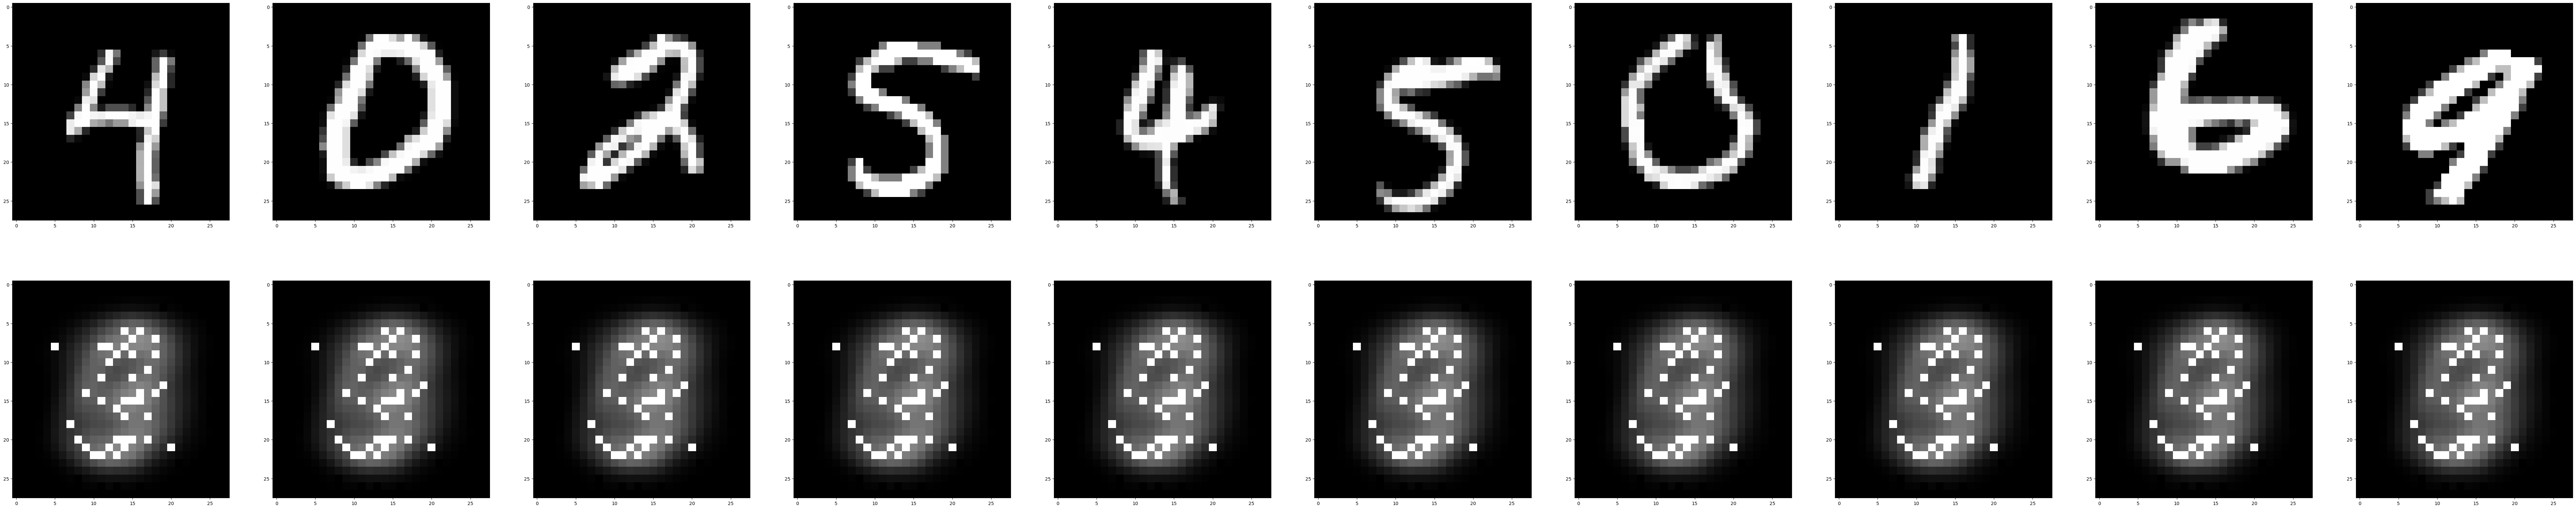

In [65]:
nb_examples = 10
index = np.random.choice(np.arange(X_test.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser3._net.forward(np.asarray([X_test[i]])))
    
    j+=1

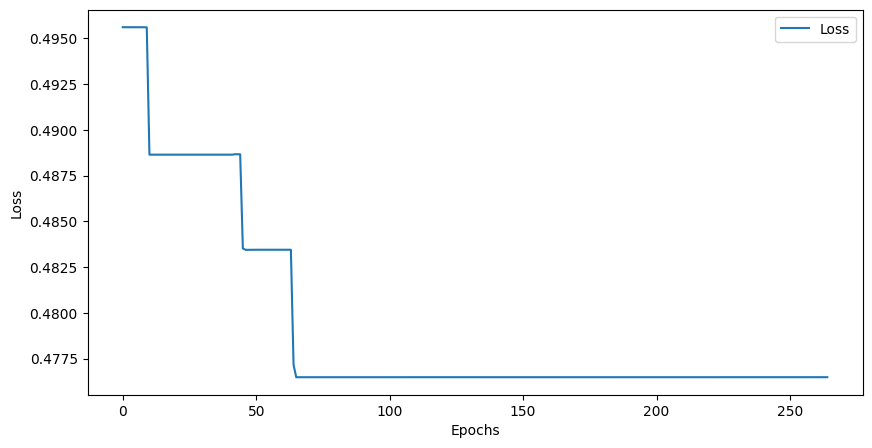

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Bruitage des données

In [20]:
noise = 0.1

X_train_noise = ut.add_noise(X_train,noise_factor=noise)
X_train_noise = ut.add_noise(X_test,noise_factor=noise)

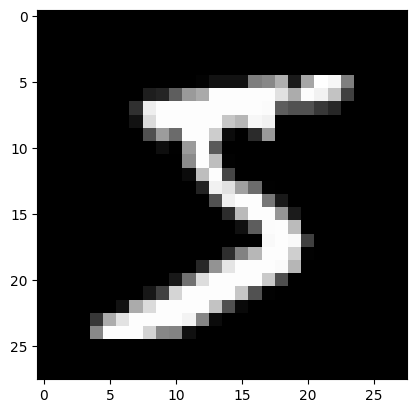

In [19]:
ut.show_usps_mnist(X_train[0])

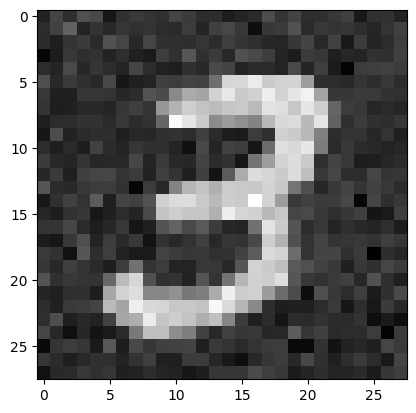

In [26]:
ut.show_usps_mnist(X_train_noise[7])

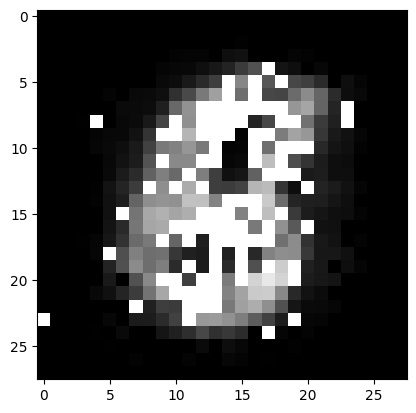

In [28]:
ut.show_usps_mnist(optimiser._net.forward(X_test)[0])

### Débruitage des données avec un facteur = 0.5

In [26]:
noise = 0.5

alltrainx_noise_2 = ut.add_noise(alltrainx,noise_factor=noise)
alltestx_noise_2 = ut.add_noise(alltestx,noise_factor=noise)

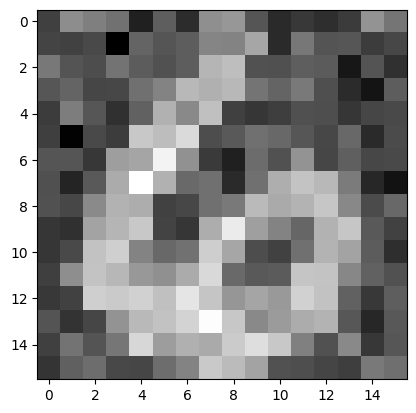

In [27]:
ut.show_usps(alltrainx_noise_2[0])

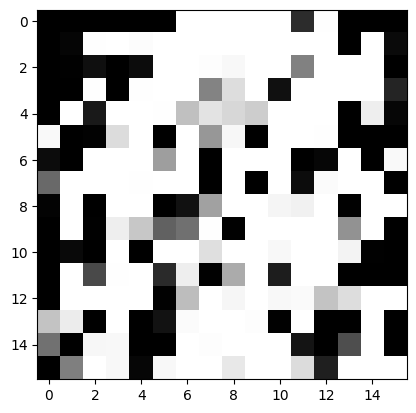

In [28]:
ut.show_usps(optimiser._net.forward(alltestx_noise_2)[0])

In [29]:
noise = 0.8

alltrainx_noise_3 = ut.add_noise(alltrainx,noise_factor=noise)
alltestx_noise_3 = ut.add_noise(alltestx,noise_factor=noise)

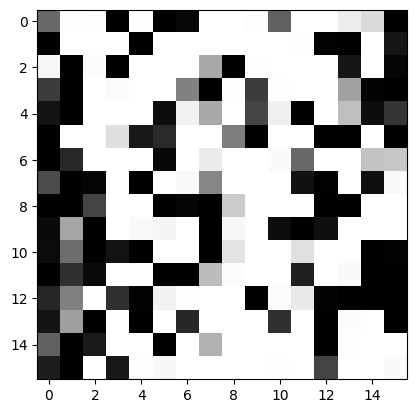

In [30]:
ut.show_usps(optimiser._net.forward(alltestx_noise_3)[0])

In [31]:
noise = 1.

alltrainx_noise_4 = ut.add_noise(alltrainx,noise_factor=noise)
alltestx_noise_4 = ut.add_noise(alltestx,noise_factor=noise)

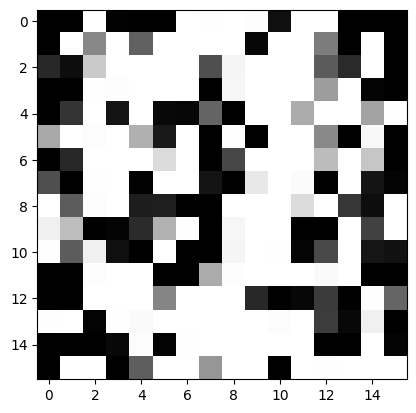

In [32]:
ut.show_usps(optimiser._net.forward(alltestx_noise_4)[0])

### Création du modéle auto_encodeur 2

In [39]:
input_size = alltrainx.shape[1]
hidden_1 = 100
output_size = 144



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

network2 = Sequentiel(Encodeur + Decodeur)


optimiser2 = Optim(network2,loss,eps=1e-3)

In [40]:
batch_size = 20
epochs = 800

optimiser2.SGD(alltrainx, alltrainx, batch_size, epochs)

0


/home/anyes/Documents/M1-DAC/S2/ML/Projet_ML/ML_Reseau_de_Neurone/Test/../loss.py:28: RuntimeWarning: divide by zero encountered in log
  return - np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat) , axis=1 , keepdims=True)
/home/anyes/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/anyes/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1


/home/anyes/Documents/M1-DAC/S2/ML/Projet_ML/ML_Reseau_de_Neurone/Test/../loss.py:28: RuntimeWarning: invalid value encountered in multiply
  return - np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat) , axis=1 , keepdims=True)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

### Bruitage des données

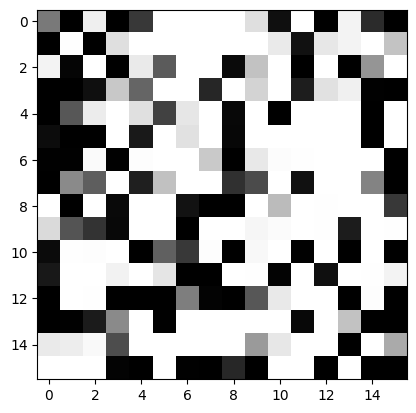

In [41]:
ut.show_usps(optimiser2._net.forward(alltestx_noise)[100])

### Débruitage des données avec un facteur = 0.5

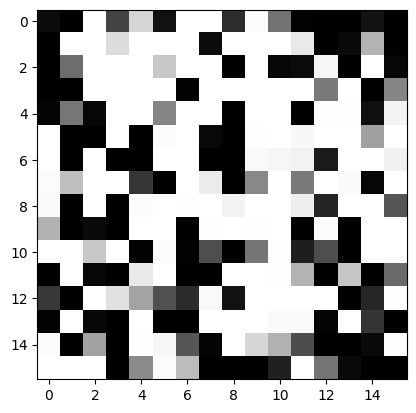

In [42]:
ut.show_usps(optimiser2._net.forward(alltestx_noise_2)[0])

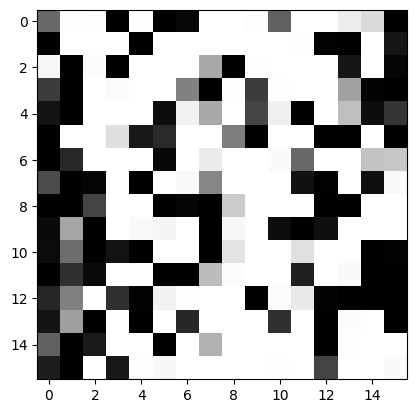

In [ ]:
ut.show_usps(optimiser2._net.forward(alltestx_noise_3)[0])

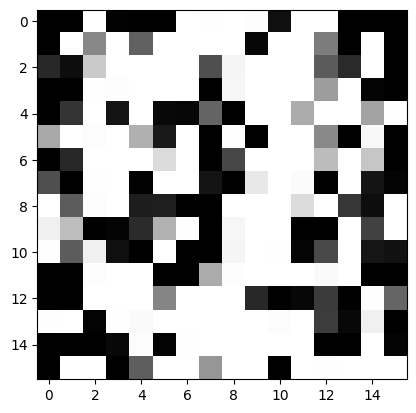

In [ ]:
ut.show_usps(optimiser2._net.forward(alltestx_noise_4)[0])

### Création du modéle auto_encodeur 3

In [43]:
input_size = alltrainx.shape[1]
hidden_1 = 144
output_size = 100



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

network3 = Sequentiel(Encodeur + Decodeur)


optimiser3 = Optim(network3,loss,eps=1e-3)

In [44]:
batch_size = 20
epochs = 1000

optimiser3.SGD(alltrainx, alltrainx, batch_size, epochs)

0


/home/anyes/Documents/M1-DAC/S2/ML/Projet_ML/ML_Reseau_de_Neurone/Test/../loss.py:28: RuntimeWarning: divide by zero encountered in log
  return - np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat) , axis=1 , keepdims=True)
/home/anyes/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/anyes/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/home/anyes/Documents/M1-DAC/S2/ML/Projet_ML/ML_Reseau_de_Neurone/Test/../loss.py:28: RuntimeWarning: invalid value encountered in multiply
  return - np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat) , axis=1 , keepdims=True)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


### Bruitage des données

In [45]:
noise = 0.3

alltrainx_noise = ut.add_noise(alltrainx,noise_factor=noise)
alltestx_noise = ut.add_noise(alltestx,noise_factor=noise)

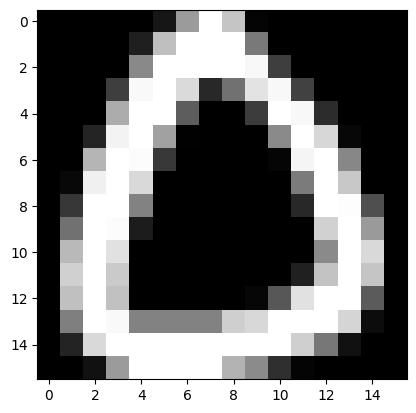

In [ ]:
ut.show_usps(alltestx[100])

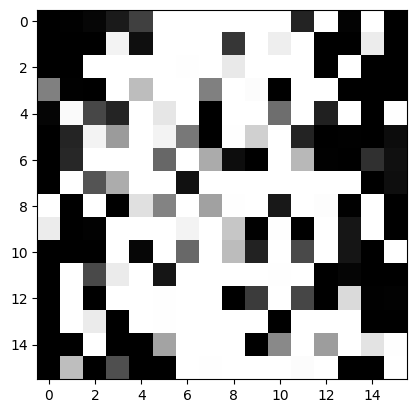

In [48]:
ut.show_usps(optimiser3._net.forward(alltrainx)[100])

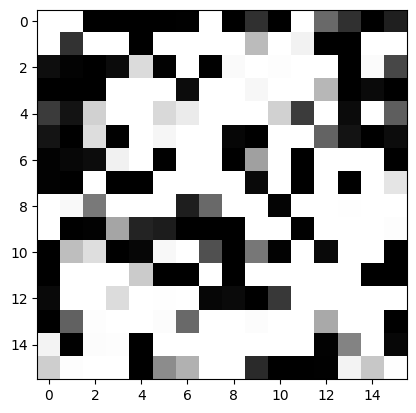

In [ ]:
ut.show_usps(optimiser._net.forward(alltestx_noise)[100])

### Débruitage des données avec un facteur = 0.5

In [ ]:
noise = 0.5

alltrainx_noise_2 = ut.add_noise(alltrainx,noise_factor=noise)
alltestx_noise_2 = ut.add_noise(alltestx,noise_factor=noise)

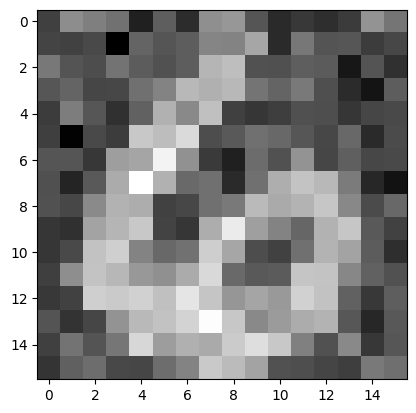

In [ ]:
ut.show_usps(alltrainx_noise_2[0])

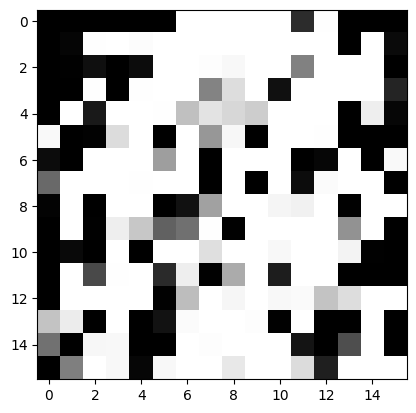

In [ ]:
ut.show_usps(optimiser._net.forward(alltestx_noise_2)[0])

In [ ]:
noise = 0.8

alltrainx_noise_3 = ut.add_noise(alltrainx,noise_factor=noise)
alltestx_noise_3 = ut.add_noise(alltestx,noise_factor=noise)

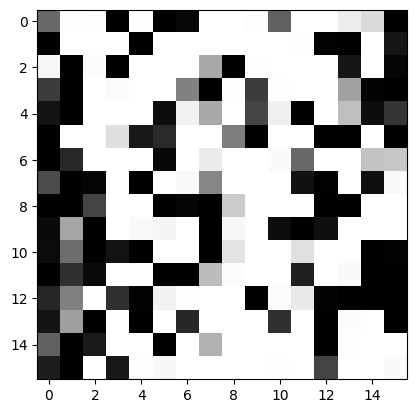

In [ ]:
ut.show_usps(optimiser._net.forward(alltestx_noise_3)[0])

In [ ]:
noise = 1.

alltrainx_noise_4 = ut.add_noise(alltrainx,noise_factor=noise)
alltestx_noise_4 = ut.add_noise(alltestx,noise_factor=noise)

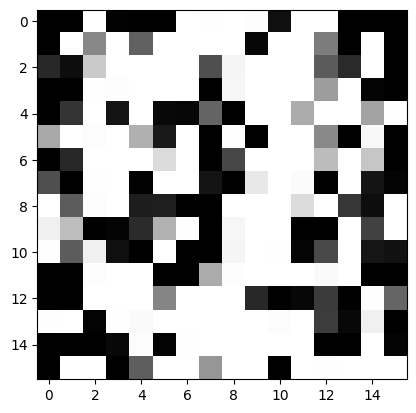

In [ ]:
ut.show_usps(optimiser._net.forward(alltestx_noise_4)[0])

## Apprentissage avec des donnéess bruitées

### Création du modéle auto_encodeur

In [49]:
input_size = alltrainx.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2

batch_size = 20
epochs = 200

In [50]:
module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

network = Sequentiel(Encodeur + Decodeur)


optimiser_1 = Optim(network,loss,eps=1e-3)

optimiser_1.SGD(alltrainx_noise, alltrainx_noise, batch_size, epochs)

0


/home/anyes/Documents/M1-DAC/S2/ML/Projet_ML/ML_Reseau_de_Neurone/Test/../loss.py:28: RuntimeWarning: divide by zero encountered in log
  return - np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat) , axis=1 , keepdims=True)
/home/anyes/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/anyes/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [51]:
ut.show_usps(optimiser_1._net.forward(alltestx_noise)[0])

The history saving thread hit an unexpected error (NameError("name 'fix' is not defined")).History will not be written to the database.


TypeError: float() argument must be a string or a number, not '_NoValueType'

NameError: name 'fix' is not defined

In [ ]:
module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

network = Sequentiel(Encodeur + Decodeur)


optimiser_2 = Optim(network,loss,eps=1e-3)

optimiser_2.SGD(alltrainx_noise_2, alltrainx_noise_2, batch_size, epochs)

In [ ]:
module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

network = Sequentiel(Encodeur + Decodeur)


optimiser_3 = Optim(network,loss,eps=1e-3)

optimiser_3.SGD(alltrainx_noise_3, alltrainx_noise_3, batch_size, epochs)

In [ ]:
module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

network = Sequentiel(Encodeur + Decodeur)


optimiser_4 = Optim(network,loss,eps=1e-3)

optimiser_4.SGD(alltrainx_noise_4, alltrainx_noise_4, batch_size, epochs)